# Walmart Sales Forecast
This notebook explores the sales data of 45 Wal-Mart locations. Exploritory data analysis was perfomed at the store and deparment level and the finding were used to forecast the sales.

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

import pandas as pd
import numpy as np
import datetime

# 1. Data Imports and Manipulation
The sales and store data was collected from [Walmart Recruiting's Kaggle Competition](https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting). This dataset only includes 4 holidays (Superbowl, Labor Day, Thanksgiving and Christmas). Entering this project with the assumption that consumer spending is heavily influenced by holidays so a [second source](https://www.timeanddate.com/holidays/us/2010?hol=17) was utilized to collect all relevant consumer spending events and commonly observed U.S. holidays.

### 1.1 Sales Data (Walmart's Holidays)

In [31]:
csv = pd.read_csv("data/sales.csv")
sales = pd.DataFrame(csv)

sales.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False
421569,45,98,2012-10-26,1076.80,False


In [32]:
sales.Date = pd.to_datetime(sales.Date)

In [33]:
sales.info()
sales.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null datetime64[ns]
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


### 1.2 Sales Data (All Holidays)

In [34]:
csv = pd.read_csv("data/holidays.csv")
holidays = pd.DataFrame(csv)

holidays.head()

,Holiday,Date
0,Black Friday,2010-11-26
1,Black Friday,2011-11-25
2,Black Friday,2012-11-23
3,Black Friday,2013-11-29
4,Christmas Day,2010-12-25


In [37]:
#holiday merge and loop
holidays.Date = pd.to_datetime(holidays.Date)
holidates = holidays.Date

byDate_all = sales.groupby('Date').sum()

for index, row in byDate_all.iterrows():
    wk_end = index
    six_days = datetime.timedelta(days = 6)
    wk_start = (wk_end - six_days)
    week = pd.date_range(start=wk_start,end=wk_end)

    try:   
        byDate_all.loc[index, "IsHoliday"] = bool(set(week) & set(holidates))
        print(f"{index}: Holiday Check Complete")

    except:
        print(f"{index}: Unable to Complete Holiday Check, Skipping...")

2010-02-05 00:00:00: Holiday Check Complete
2010-02-12 00:00:00: Holiday Check Complete
2010-02-19 00:00:00: Holiday Check Complete
2010-02-26 00:00:00: Holiday Check Complete
2010-03-05 00:00:00: Holiday Check Complete
2010-03-12 00:00:00: Holiday Check Complete
2010-03-19 00:00:00: Holiday Check Complete
2010-03-26 00:00:00: Holiday Check Complete
2010-04-02 00:00:00: Holiday Check Complete
2010-04-09 00:00:00: Holiday Check Complete
2010-04-16 00:00:00: Holiday Check Complete
2010-04-23 00:00:00: Holiday Check Complete
2010-04-30 00:00:00: Holiday Check Complete
2010-05-07 00:00:00: Holiday Check Complete
2010-05-14 00:00:00: Holiday Check Complete
2010-05-21 00:00:00: Holiday Check Complete
2010-05-28 00:00:00: Holiday Check Complete
2010-06-04 00:00:00: Holiday Check Complete
2010-06-11 00:00:00: Holiday Check Complete
2010-06-18 00:00:00: Holiday Check Complete
2010-06-25 00:00:00: Holiday Check Complete
2010-07-02 00:00:00: Holiday Check Complete
2010-07-09 00:00:00: Holiday Che

In [39]:
byDate_all.IsHoliday = byDate_all.IsHoliday.astype('int')
byDate_all.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,65124,130557,49750740.50,0
2010-02-12,65082,131179,48336677.63,1
2010-02-19,65610,131897,48276993.78,1
2010-02-26,65045,130161,43968571.13,0
2010-03-05,64897,129670,46871470.30,0


### 1.3 Store Data 

In [ ]:
csv = pd.read_csv("data/stores.csv")
stores = pd.DataFrame(csv)

stores.tail()

In [ ]:
stores.info()
stores.describe()

# 2. EDA

In [13]:
#setting color palette for charts
pio.templates.default = "plotly_white"
walmart_palette = ['#004c91','#007dc6','#78b9e7','#f47321','#ffc220','#76c043']

### 1.1 Record Counts
Review missing values

In [14]:
sales.nunique()

Store               45
Dept                81
Date               143
Weekly_Sales    359464
IsHoliday            2
dtype: int64

In [15]:
45*81*143 == len(sales)

False

In [16]:
#Departments with missing weekly sales
sales.groupby('Dept').nunique().query("Date<143")

,Store,Dept,Date,Weekly_Sales,IsHoliday
Dept,,,,,
39,5,1,16,12,2
43,5,1,12,6,2
47,37,1,138,277,2
51,37,1,131,780,2
77,37,1,35,58,2
78,37,1,82,38,2
99,37,1,94,311,2


In [17]:
#Stores with missing weekly sales
sales.groupby('Store').nunique().query("Date<143")

,Store,Dept,Date,Weekly_Sales,IsHoliday
Store,,,,,


In [18]:
#Number of unique depts per store
sales.groupby('Store').nunique()

,Store,Dept,Date,Weekly_Sales,IsHoliday
Store,,,,,
1,1,77,143,10042,2
2,1,78,143,10088,2
3,1,72,143,8688,2
4,1,78,143,10098,2
5,1,72,143,8594,2
6,1,77,143,10076,2
7,1,76,143,9391,2
8,1,76,143,9667,2
9,1,73,143,8627,2


### 1.2 Sales Analysis
High-level analysis of sales and holiday's potential influence on seasonality

In [19]:
byDate = sales.groupby('Date',sort=False).sum()
byDate.IsHoliday = byDate.IsHoliday.astype('bool').astype('int')
byDate.index.freq = 'W-FRI'
byDate.head()

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,65124,130557,49750740.50,0
2010-02-12,65082,131179,48336677.63,1
2010-02-19,65610,131897,48276993.78,0
2010-02-26,65045,130161,43968571.13,0
2010-03-05,64897,129670,46871470.30,0


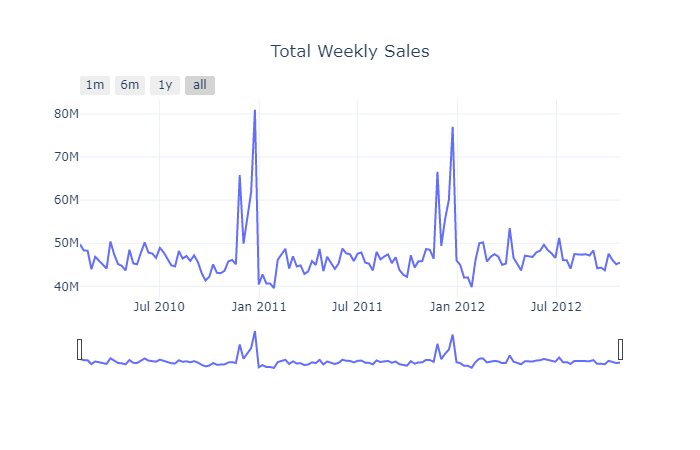

In [20]:
byDate_line = go.Figure(data=go.Scatter(x=byDate.index,y=byDate.Weekly_Sales, name='Weekly_Sales'))
byDate_line.update_layout(title={
        'text': "Total Weekly Sales",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)
byDate_line.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
byDate_line.update_layout(title={
        'text': "Total Weekly Sales",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
byDate_line.show("png")
#byDate_line.show()

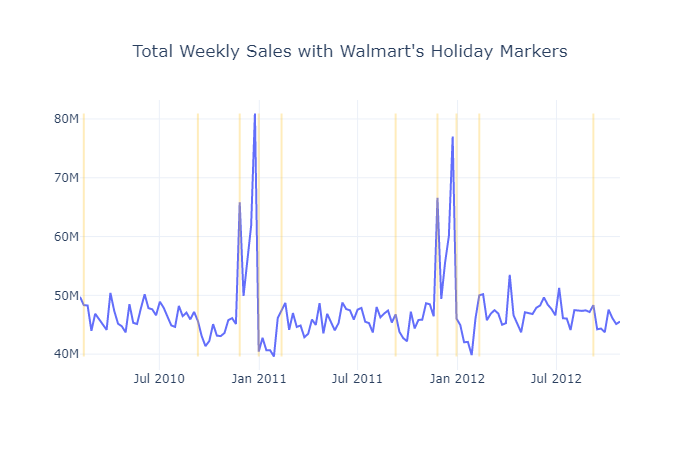

In [26]:
ymin=byDate.Weekly_Sales.min()
ymax=byDate.Weekly_Sales.max()

byDate_wm_markers = go.Figure(data=go.Scatter(x=byDate.index,y=byDate.Weekly_Sales, name='Weekly_Sales'))

final_wk = max(byDate.index)
for date in byDate.query("IsHoliday==1").index:
    byDate_wm_markers.add_shape(type="line",
                   x0=date,
                   y0=ymin,
                   x1=date,
                   y1=ymax,
                   opacity=0.3,
                  line=dict(color=walmart_palette[4]))

byDate_wm_markers.update_layout(title={
        'text': "Total Weekly Sales with Walmart's Holiday Markers",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
byDate_wm_markers.show('png')
#byDate_wm_markers.show()

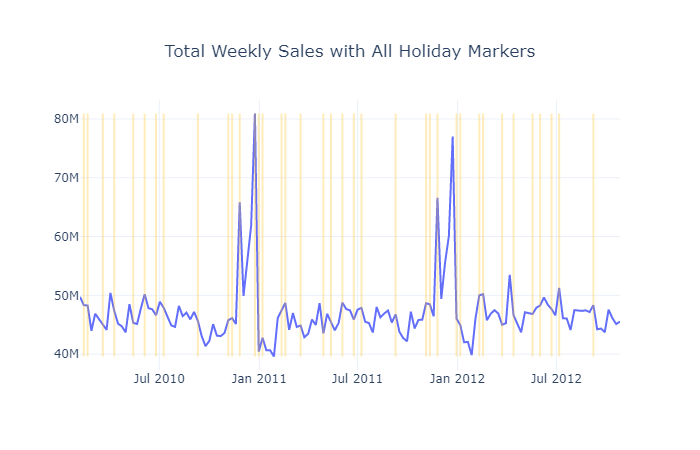

In [40]:
byDate_all_markers = go.Figure(data=go.Scatter(x=byDate_all.index,y=byDate_all.Weekly_Sales, name='Weekly_Sales'))

for date in byDate_all.query("IsHoliday==1").index:
    byDate_all_markers.add_shape(type="line",
                   x0=date,
                   y0=ymin,
                   x1=date,
                   y1=ymax,
                   opacity=0.3,
                  line=dict(color=walmart_palette[4]))

byDate_all_markers.update_layout(title={
        'text': "Total Weekly Sales with All Holiday Markers",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
byDate_all_markers.show('png')
#byDate_all_markers.show()

## Sales by Store

In [ ]:
byStore = sales.reset_index().groupby('Store', as_index=False).sum()
byStore = pd.merge(byStore, stores, on='Store', how='left')
byStore.head()

In [ ]:
#Total number of stores
byStore.nunique()

In [ ]:
#Formatting df for visuals
byStore = byStore[["Store", "Weekly_Sales", "Type", "Size"]]
byStore.head()

In [ ]:
byStore_Bar = go.Figure(data=go.Bar(x=byStore.Store,
                                y=byStore.Weekly_Sales, 
                                name='Weekly_Sales')
)



byStore_Bar.update_layout(title={
        'text': "Total Weekly Sales by Store",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

byStore_Bar.show('png')
#byStore_Bar.show()

In [1]:
fig = px.box(byStore, x="Type", y="Weekly_Sales", color="Type")
.update_layout(title={
        'text': "Total Weekly Sales by Store",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show('png')
#fig.show()

NameError: name 'px' is not defined

In [ ]:
fig = px.box(byStore, x="Type", y="Size", color="Type")
.update_layout(title={
        'text': "Total Weekly Sales by Store",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show('png')
#fig.show()

In [ ]:
size_Dist = px.histogram(byStore, x="Size", color='Type')
.update_layout(title={
        'text': "Total Weekly Sales by Store",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
size_Dist.show('png')
#size_Dist.show()

In [ ]:
fig = px.scatter(byStore, x="Size",y='Weekly_Sales',color='Type')
.update_layout(title={
        'text': "Total Weekly Sales by Store",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show('png')
#fig.show()

In [ ]:
byStore['SalesPerSF'] = byStore.Weekly_Sales/byStore.Size

fig = px.scatter(byStore, x="Size",y='SalesPerSF',color='Type')
.update_layout(title={
        'text': "Total Weekly Sales by Store",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show('png')
#fig.show()

### Cluster Stores

In [ ]:
byStorex = byStore[['SalesPerSF','Weekly_Sales', 'Size']]
byStorex.head()

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6) 
kmeans.fit(byStorex)
byStorex['Cluster'] = kmeans.labels_
byStorex.head()

In [ ]:
fig = px.scatter(byStorex, x="Size",y='SalesPerSF',color='Cluster', size='Weekly_Sales')
fig.update_layout(title={
        'text': "Total Weekly Sales by Store",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show('png')
#fig.show()

In [ ]:
fig = px.box(byStorex, x="Cluster", y="SalesPerSF", color="Cluster")
fig.update_layout(title={
        'text': "Total Weekly Sales by Store",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show('png')
#fig.show()

# Sales by Dept
Which departments are influenced by seasonality?

In [ ]:
#number of unique departments
sales['Dept'].nunique()

In [ ]:
byDept = sales.groupby(['Dept']).sum()
byDept.head()

In [ ]:
byDept_Bar = px.bar(byDept, y='Weekly_Sales')
byDept_Bar.show('png')
#byDept_Bar.show()

In [ ]:
byDept.query('Weekly_Sales<=0')

## DICKEY-FULLER TEST
determine stationarity...lags!!

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
#salesx = pd.read_csv("data/sales.csv")
#salesx.head()

In [ ]:
#median number of records for depts with NO missing week
sales.groupby('Dept').nunique().sort_values('Date').query('Date==143')['Weekly_Sales'].median()

In [ ]:
sales.Date.nunique()

In [ ]:
#Depts with missing weeks
dept_w_missing_wks = sales.groupby('Dept').nunique().sort_values('Date').query('Date<143')
missing_wks = dept_w_missing_wks.index

In [ ]:
for dept in missing_wks:
    data = sales.query(f"Dept=={dept}").groupby('Date').sum()
    fig = px.line(data, y="Weekly_Sales")
    fig.show('png')

In [ ]:
stat_list = []
stat_bool_list = []
dept_list = []
depts = sales.Dept.unique()
for dept in depts:
    if dept in missing_wks:
        continue
        
    byDeptx = sales.query(f"Dept=={dept}").groupby('Date').sum()
    dftest = adfuller(byDeptx['Weekly_Sales'], maxlag=55)
    p_value = dftest[1]
    lags = dftest[2]

    if p_value <= 0.05:
        stationarity = "Stationary"
        station_bool = 1
        
    else:
        stationarity = "Non-Stationary"
        station_bool = 0
    
    dept_list.append(dept)
    stat_list.append(stationarity)
    stat_bool_list.append(station_bool)

stationarities = pd.DataFrame({'Dept': dept_list,
                              'Stationary': stat_list,
                              'Stationary_Bool': stat_bool_list})
stationarities.head()

In [ ]:
byStat = pd.merge(sales, stationarities, on='Dept', how='left')
byStat = byStat.groupby(['Stationary','Date'], as_index=False).sum()

byStat.head()

In [ ]:
byStat_line = px.line(byStat,x='Date', y='Weekly_Sales', color='Stationary')
byStat_line.show('png')
#byStat_line.show()

In [ ]:
fig = px.pie(byStat, values='Weekly_Sales', names='Stationary')
fig.show('png')
#fig.show()

# 3. Forecasting

## Seasonal Decomposition

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(byDate['Weekly_Sales'], model='add')
result.plot();

# SARIMA

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from pmdarima import auto_arima    

In [ ]:
models = byDate[['Weekly_Sales', 'IsHoliday']]
models.IsHoliday = byDate.IsHoliday.astype('bool').astype('int')
models.head()

In [ ]:
models.index.freq = 'W-FRI'
models.index

In [ ]:
#confirm stationarity
adfuller(models['Weekly_Sales'], maxlag=55)

In [ ]:
#Run pmdarima.auto_arima to obtain recommended orders
auto_arima(models['Weekly_Sales'],seasonal=True,m=52).summary()

In [ ]:
#Split the data into train/test setsdates = models.index
length = len(models)
train_len = int(length*0.70)

train = models.iloc[:train_len]
test = models.iloc[train_len:]

In [ ]:
#Fit a SARIMA(1,0,0)(2,0,0,7) Model
model1 = SARIMAX(train['Weekly_Sales'],order=(2,0,2),seasonal_order=(1,0,0,52),enforce_invertibility=False)
results = model1.fit()
results.summary()

In [ ]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
predictions1 = results.predict(start=start, end=end, dynamic=False)
models['NoHolidays'] = predictions1
models.dropna(inplace=True)
models.head()

In [ ]:
models_lines = go.Figure()

models_lines.add_trace(
    go.Scatter(
        x=models.index,
        y=models.Weekly_Sales,
        name = "Weekly Sales - Actual"
    ))

models_lines.add_trace(
    go.Scatter(
        x=models.index,
        y=models.NoHolidays,
        name = "Model 1 - No Holidays"
    ))

models_lines.show('png')
#models_lines.show()

In [ ]:
from statsmodels.tools.eval_measures import mse,rmse

mse1 = mse(test['Weekly_Sales'], predictions1)
rmse1 = rmse(test['Weekly_Sales'], predictions1)

print(f"MSE: {mse1}\nRMSE: {rmse1}")

# SARIMAX - WalMart Holidays
add the exog variable

In [ ]:
model2 = SARIMAX(train['Weekly_Sales'],exog=train['IsHoliday'],order=(2,0,2),seasonal_order=(1,0,0,52),enforce_invertibility=False)
results = model2.fit()
results.summary()

In [ ]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
exog_forecast = test[['IsHoliday']]  # requires two brackets to yield a shape of (35,1)
predictions2 = results.predict(start=start, end=end, exog=exog_forecast)
models['WalmartHolidays'] = predictions2
models.head()

In [ ]:
models_lines.add_trace(
    go.Scatter(
        x=models.index,
        y=models.WalmartHolidays,
        name = "Model 2 - with Walmart Holidays"
    ))
models_lines.show('png')
#models_lines.show()

In [ ]:
testmin = test.index.min()
testmax = test.index.max()
trainmin = train.index.min()
trainmax = train.index.max()

print(f"Train Set: {trainmin} - {trainmax}\nTest Set: {testmin} - {testmax}")

In [ ]:
mse2 = mse(test['Weekly_Sales'], predictions2)
rmse2 = rmse(test['Weekly_Sales'], predictions2)

print(f"MSE: {mse2}\nRMSE: {rmse2}")

# SARIMAX - All Holidays
add the exog variable

In [ ]:
byDatex = byDate_all
byDatex.head()

In [ ]:
#Split the data into train/test setsDatexs = byDatex.index
length = len(byDatex)
train_len = int(length*0.70)

train = byDatex.iloc[:train_len]
test = byDatex.iloc[train_len:]

In [ ]:
model3 = SARIMAX(train['Weekly_Sales'],exog=train['IsHoliday'],order=(2,0,2),seasonal_order=(1,0,0,52),enforce_invertibility=False)
results = model3.fit()
results.summary()

In [ ]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1
exog_forecast = test[['IsHoliday']]  # requires two brackets to yield a shape of (35,1)
predictions3 = results.predict(start=start, end=end, exog=exog_forecast)
models['AllHolidays'] = predictions3
models.head()

In [ ]:
models_lines.add_trace(
    go.Scatter(
        x=models.index,
        y=models.AllHolidays,
        name = "Model 3 - All Holidays"
    ))
models_lines.show('png')
#models_lines.show()

In [ ]:
from statsmodels.tools.eval_measures import mse,rmse

In [ ]:
mse3 = mse(test['Weekly_Sales'], predictions3)
rmse3 = rmse(test['Weekly_Sales'], predictions3)

print(f"MODEL 1\n MSE: {mse1}\n RMSE: {rmse1}\n")
print(f"MODEL 2\n MSE: {mse2}\n RMSE: {rmse2}\n")
print(f"MODEL 3\n MSE: {mse3}\n RMSE: {rmse3}")

## Forecast the Future

#### Retrain all data on Model 1

In [ ]:
byDate = byDate[['Weekly_Sales','IsHoliday']]
byDate.head()

In [ ]:
csv = pd.read_csv("data/fcast.csv")
fcast_dates = pd.DataFrame(csv)
fcast_dates.IsHoliday = fcast_dates.IsHoliday.astype('bool').astype('int')
fcast_dates.Date = pd.to_datetime(fcast_dates.Date)
fcast_dates.head()

In [ ]:
fcast_dates.set_index('Date', inplace=True)
fcast_dates.index.freq = 'W-FRI'
fcast_dates.index

In [ ]:
byDate.index

In [ ]:
len(fcast_dates)
len(test)

In [ ]:
model2x = SARIMAX(byDate['Weekly_Sales'],order=(2,0,2),seasonal_order=(1,0,0,52),enforce_invertibility=False)
results = model2x.fit()
exog_forecast = fcast_dates[['IsHoliday']]
fcast_predics = results.predict(fcast_dates.index.min(),fcast_dates.index.max(),exog=exog_forecast)

In [ ]:
fcast_dates['Weekly_Sales'] = fcast_predics
fcast_dates['SalesType'] = "Forecast"
fcast_dates.head()

In [ ]:
byDate['SalesType'] = "Actual"
byDate.head()

In [ ]:
byDateFcast = pd.concat([byDate,fcast_dates])
byDateFcast

In [ ]:
fcast_line = px.line(byDateFcast, x=byDateFcast.index,y='Weekly_Sales', color='SalesType')
fcast_line.show('png')
#fcast_line.show()